<a href="https://colab.research.google.com/github/pattrickx/NLP_tweeter/blob/main/NLP_Tweeter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dependencies

In [ ]:
!pip install textblob==0.15.3
!pip install autocorrect==2.6.1
!pip install unidecode==1.3.3

     |████████████████████████████████| 622 kB 7.7 MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622382 sha256=bb6995020bcf8bea7445b3dbcb63da1edb7ee0ec2eec9f1e89f377621260e84d
  Stored in directory: /root/.cache/pip/wheels/54/d4/37/8244101ad50b0f7d9bffd93ce58ed7991ee1753b290923934b
Successfully built autocorrect
     |████████████████████████████████| 235 kB 6.1 MB/s 


### Imports

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import os
import sys
import tweepy as tw
import pandas as pd

### Get Tweeter data

In [ ]:
api_keys = eval(open("/content/drive/MyDrive/My_projects/api.txt", 'r').read())

In [68]:
auth = tw.OAuthHandler(api_keys['consumer_key'], api_keys['consumer_secret'])
auth.set_access_token(api_keys['access_token'], api_keys['access_token_secret'])
api = tw.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

tweets = tw.Cursor(api.search,
            q='#Flutter OR Flutter OR #flutter OR flutter OR #FlutterDev OR FlutterDev OR #flutterdev OR flutterdev -filter:retweets'
            ,lang='en'
            # ,since="2022-02-17"
            # ,until="2022-02-18"
            ,result_type="recent"
            ).items(2000)

tweet_list = []
for tweet in tweets:
    tweet_list.append([tweet.created_at,tweet.text])
    # tweet_list +=f" {tweet.text}"

# df_tweet = pd.DataFrame(columns=['created_at','text'],data=tweet_list)
# df_tweet.to_csv("/content/drive/MyDrive/My_projects/df_tweet.csv")
tweet_string=''
for i in tweet_list:
    tweet_string +=f"{i[1]} "
len(tweet_list)

2000

### Word Cloud

#### Stopwords

In [69]:
# importa a biblioteca
import nltk

# baixa as stopwords
nltk.download('stopwords')

# para escolher as stopwords do português adicionamos a opçaõ de língua "portuguese"
stopwords = nltk.corpus.stopwords.words('portuguese') + nltk.corpus.stopwords.words('english')
stopwords_full = stopwords

tweeter_stopwords = ['https','pra','co','of','tá','né',
                 'hj','vc','ta','pq','on','CO','Co','SGDmAmMPVT',
                 'RT','pro','acho','vou','to','tô',
                #  'flutter','Flutter'
                ]

stopwords_full = stopwords + tweeter_stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Create cloud

In [70]:
mask_path = '/content/drive/MyDrive/My_projects/twitter-logo.png'
mask = np.array(Image.open(mask_path))
wc = WordCloud(
    background_color='white',
    stopwords=stopwords_full,
    height=720,
    width=1080,
    mask=mask,
   contour_color='black',
   contour_width=2
)
wc.generate(tweet_string)
wc.to_file('wc.png')

# Analysis

##Data cleaning

In [99]:
import re
from bs4 import BeautifulSoup 
from autocorrect import Speller
import unidecode
import nltk.corpus
from nltk.corpus import stopwords
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
# !wget https://data.iana.org/TLD/tlds-alpha-by-domain.txt
# top_level_domains_list = open('tlds-alpha-by-domain.txt','r').read().splitlines()[1:]
# print(top_level_domains_list)
# top_level_domains_string=""
# for i in top_level_domains_list:
#     top_level_domains_string += f"|.{i}".lower() if top_level_domains_string else f".{i}".lower()
# print(top_level_domains_string)

In [89]:
def remove_urls(text):
    # Removing all the occurrences of links that starts with https
    remove_https = re.sub(r'http\S+', '', text)
    remove_https = re.sub(r'www.+', '', remove_https)
    # Remove all the occurrences of text that ends with .com
    # remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
    return remove_https

In [90]:
def remove_newlines_tabs(text):
    # Replacing all the occurrences of \n,\\n,\t,\\ with a space.
    Formatted_text = text.replace('\\n', ' ').replace('\n', ' ').replace('\t',' ').replace('\\', ' ').replace('. com', '.com')
    return Formatted_text

In [91]:
def strip_html_tags(text):
    # Initiating BeautifulSoup object soup.
    soup = BeautifulSoup(text, "html.parser")
    # Get all the text other than html tags.
    stripped_text = soup.get_text(separator=" ")
    return stripped_text

In [92]:
def lower_casing_text(text):
    # Convert text to lower case
    # lower() - It converts all upperase letter of given string to lowercase.
    text = text.lower()
    return text

In [93]:
def reducing_incorrect_character_repeatation(text):
    """
    This Function will reduce repeatition to two characters 
    for alphabets and to one character for punctuations.
    
    arguments:
         input_text: "text" of type "String".
         
    return:
        value: Finally formatted text with alphabets repeating to 
        two characters & punctuations limited to one repeatition 
        
    Example:
    Input : Realllllllllyyyyy,        Greeeeaaaatttt   !!!!?....;;;;:)
    Output : Reallyy, Greeaatt !?.;:)
    
    """
    # Pattern matching for all case alphabets
    Pattern_alpha = re.compile(r"([A-Za-z])\1{1,}", re.DOTALL)
    
    # Limiting all the  repeatation to two characters.
    Formatted_text = Pattern_alpha.sub(r"\1\1", text) 
    
    # Pattern matching for all the punctuations that can occur
    Pattern_Punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
    
    # Limiting punctuations in previously formatted string to only one.
    Combined_Formatted = Pattern_Punct.sub(r'\1', Formatted_text)
    
    # The below statement is replacing repeatation of spaces that occur more than two times with that of one occurrence.
    Final_Formatted = re.sub(' {2,}',' ', Combined_Formatted)
    return Final_Formatted

In [94]:
def removing_special_characters(text):
    """Removing all the special characters except the one that is passed within 
       the regex to match, as they have imp meaning in the text provided.
   
    
    arguments:
         input_text: "text" of type "String".
         
    return:
        value: Text with removed special characters that don't require.
        
    Example: 
    Input : Hello, K-a-j-a-l. Thi*s is $100.05 : the payment that you will recieve! (Is this okay?) 
    Output :  Hello, Kajal. This is $100.05 : the payment that you will recieve! Is this okay?
    
   """
    # The formatted text after removing not necessary punctuations.
    Formatted_Text = re.sub(r"[^a-zA-Z:$-,%.?!]+", ' ', text) 
    # In the above regex expression,I am providing necessary set of punctuations that are frequent in this particular dataset.
    return Formatted_Text

In [95]:
def spelling_correction(text,lang='en'):
    ''' 
    This function will correct spellings.
    
    arguments:
         input_text: "text" of type "String".
         
    return:
        value: Text after corrected spellings.
        
    Example: 
    Input : This is Oberois from Dlhi who came heree to studdy.
    Output : This is Oberoi from Delhi who came here to study.
      
    
    '''
    # Check for spellings in English language
    spell = Speller(lang=lang)
    Corrected_text = spell(text)
    return Corrected_text

In [96]:
def remove_stopwords(text,lang='en'):

    stopwords_list = stopwords.words('english')
    if lang == 'pt':
        stopwords_list = nltk.corpus.stopwords.words('portuguese')

    text = repr(text)
    # Text without stopwords
    No_StopWords = [word for word in word_tokenize(text) if word.lower() not in stopwords_list ]
    # Convert list of tokens_without_stopwords to String type.
    words_string = ' '.join(No_StopWords)    
    return words_string

In [97]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatization(text):
    """
    Example: 
    Input : text reduced 
    Output :  text reduce
    
   """
    # Converting words to their root forms
    lemma = [lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text)]
    return lemma

In [109]:
def pre_process(text, lang ='en'):
    text = remove_urls(text.lower())
    text = remove_newlines_tabs(text)
    text = unidecode.unidecode(text) # remove acentos
    text = remove_stopwords(text,lang)
    text = reducing_incorrect_character_repeatation(text)
    text = removing_special_characters(text)
    text = spelling_correction(text,lang)
    # text = lemmatization(text)
    return text

In [119]:
text_list = ['O Arthur tá insuportável!!! #BBB22 E o Arthur #RedeBBBB #JadePicon #JadePicon Que o Arthur https://t.co/akhVbZI4MJ',
             '• Opinem!🗯 ESLOVÊNIA 🇸🇮 #BBB22 , Arthur anjo , scooby e pa, linna e jessi, #arthuraguiar , #JadePicon',
             '@jadepicon provocandoo Arthur ADM, sabe que o emoji dele é um pão 😭😭😭😭😭😭😭😭😭😭😭','@JadePInfos @jadepicon EUUUU VAMOOO cambada 💖',
             '@Annasousa_9 @jadepicon BRIGADA NENEEEE','Eu vendo os adm da @jadepicon E do @iampauloandre interagindo e zoando com as situações hahaha amooooo 💜💓 https://t.co/X44tw64Qn2',
             '@comentacaroles É ESSE TIPO DE TRABALHO TEM QUE SE FEITO DESMENTIR NA HORA QUALQUER FAKE @jadepicon @LeoPicon']
for text in text_list:
    print(pre_process(text,'pt'))

dictionary for this language not found, downloading...
__________________________________________________
couldn't download http://ipfs.io/ipfs/QmbRSZvfJV6zN12zzWhecphcvE9ZBeQdAJGQ9c9ttJXzcg/pt.tar.gz, trying next url...
__________________________________________________
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>'o arthur ta insuportável ! ! ! br arthur recebi jadepicon jadepicon arthur '
'* opinei ! eslovenia br , arthur anjo , scooby pa , linfa esse , arthuraguiar , jadepicon '
' jadepicon provocando arthur am , sabe movi ao '
' jadepinfos jadepicon eu vamos cambada '
' annasousa jadepicon obrigada gente '
'eu vendo am jadepicon iampauloandre intervindo voando situaçes havana amoo '
' comentacaroles tipo trabalho feito desmentir hora qualquer face jadepicon leopicon '


##Analisis

In [ ]:
from textblob import TextBlob

In [ ]:
def is_english(text):
    if text.detect_language() == 'en':
        return True
    return False

In [82]:
def tweet_analysis():
    polarities = []
    erros = 0
    Tweets_data=[]
    for n,tweet in enumerate(tweet_list):
        # if n>100:
        #     break
        processed = pre_process(tweet[1],'en')
        phrase = TextBlob(processed)
        
        try:
            # if not is_english(phrase):
            # phrase = TextBlob(str(phrase.translate(to='en')))

            if (phrase.sentiment.polarity != 0.0 and phrase.sentiment.subjectivity != 0.0):
                polarities.append(phrase.sentiment.polarity)


            # print('Tweet: ' + tweet[1])
            # print('Polarity: ' + str(phrase.sentiment.polarity) + " \ " + str(phrase.sentiment.subjectivity))
            # print('.....................')
            Tweets_data.append([tweet[0],tweet[1],phrase.sentiment.polarity,phrase.sentiment.subjectivity,processed])
        except:
            erros+=1
            print(f"erro n: {erros}")
            pass

    print(f"erro n: {erros}")
    return pd.DataFrame(columns=['time','tweet','polarity','subjectivity','tweet_processed'],data=Tweets_data)

In [83]:
def print_result_new(mean):
    if mean >= 0.6:
        print(f"VERY POSITIVE \nMean:{mean}")
    elif mean >= 0.2:
        print(f"POSITIVE \nMean:{mean}") 
    elif mean == 0.0:
        print(f"TRUE NEUTRO \nMean:{mean}")
    elif mean>=-0.2:
        print(f"NEUTRO \nMean:{mean}")
    elif mean>=-0.6:
        print(f"NEGATIVE \nMean:{mean}")
    else:
        print(f"VERY NEGATIVE \nMean:{mean}")

In [84]:
def print_result(mean):
    if mean > 0.0:
        print(f"POSITIVE \nMean:{mean}")
    elif mean == 0.0:
        print(f"NEUTRO \nMean:{mean}")
    else:
        print(f"NEGATIVE \nMean:{mean}")

In [85]:
def result(mean):
    if mean > 0.0:
        return "POSITIVE"
    elif mean == 0.0:
        return "NEUTRO"
    else:
        return "NEGATIVE"

In [86]:
def result_new(mean):
    if mean >= 0.6:
        return "VERY POSITIVE"
    elif mean >= 0.2:
        return "POSITIVE"
    elif mean > 0.0:
        return "LITTLE POSITIVE"
    elif mean == 0.0:
        return "NEUTRO"
    elif mean>=-0.2:
        return "LITTLE NEGATIVE"
    elif mean>=-0.6:
        return "NEGATIVE"
    
    return "VERY NEGATIVE"

In [112]:
df_tweets = tweet_analysis()
df_tweets

erro n: 0


,time,tweet,polarity,subjectivity,tweet_processed
0,2022-02-21 17:35:49,"Looking for a simple, speedy SDK that lets you...",0.000000,0.378571,"'looking simple , speedy sdk lets build scalab..."
1,2022-02-21 17:35:36,#BheemlaNayak \nRuntime 2hrs 25mins\n\nOrigina...,0.375000,0.750000,' bheemlanayak runtime hrs mins original ayyap...
2,2022-02-21 17:35:03, Don't Count on Chickens\n#Python #Roblox #Io...,0.000000,0.000000,n't count chickens python robot iot riot azur...
3,2022-02-21 17:34:15,@blaire_pcrs Ahhhhhh!!! you make my heart feel...,0.500000,1.000000,blair crs ah ! ! ! make heart feel clutter ! ...
4,2022-02-21 17:34:02,“‘My motive for the usual practice a reel at t...,-0.250000,0.250000,' '' 'my motive usual practice reel respectabi...
...,...,...,...,...,...
1995,2022-02-20 15:00:03,The #dataScientist Skills You Need to Succeed...,0.000000,0.000000,'the datascientist skills need succeed . digit...
1996,2022-02-20 14:59:54,This makes my little nonbinary heart flutter w...,-0.366211,0.500000,'this makes little nonbinary heart clutter exc...
1997,2022-02-20 14:59:19,@snowleopardess8 It could be said that on thos...,0.700000,0.600000,' snowleopardess could said two showings putti...
1998,2022-02-20 14:58:43,@momma_flutter @jess_woodruff This made me tea...,0.000000,0.000000,' comma clutter jess woodruff made tear ! miss...


In [113]:
polarity_mean = np.mean(df_tweets['polarity'])
print_result(polarity_mean)
print_result_new(polarity_mean)

POSITIVE 
Mean:0.10175425915447397
NEUTRO 
Mean:0.10175425915447397


In [114]:
weighted_polarity_mean = np.average(df_tweets['polarity'],weights=df_tweets['subjectivity'])
print_result(weighted_polarity_mean)
print_result_new(weighted_polarity_mean)

POSITIVE 
Mean:0.2537968162589081
POSITIVE 
Mean:0.2537968162589081


NEUTRO      1098
POSITIVE     700
NEGATIVE     202
Name: sentiment, dtype: int64


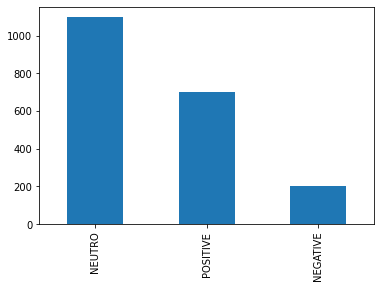

In [115]:
df_tweets['sentiment'] = df_tweets['polarity'].apply(lambda r: result(r))
df_tweets['sentiment'].value_counts().plot.bar()
print(df_tweets['sentiment'].value_counts())

NEUTRO             1098
POSITIVE            390
LITTLE POSITIVE     185
VERY POSITIVE       125
LITTLE NEGATIVE     113
NEGATIVE             76
VERY NEGATIVE        13
Name: sentiment, dtype: int64


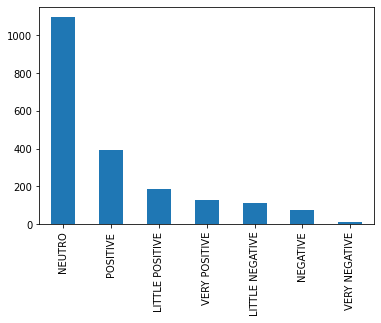

In [116]:
df_tweets['sentiment'] = df_tweets['polarity'].apply(lambda r: result_new(r))
df_tweets['sentiment'].value_counts().plot.bar()
print(df_tweets['sentiment'].value_counts())

In [117]:
import cv2
from matplotlib import pyplot as plt

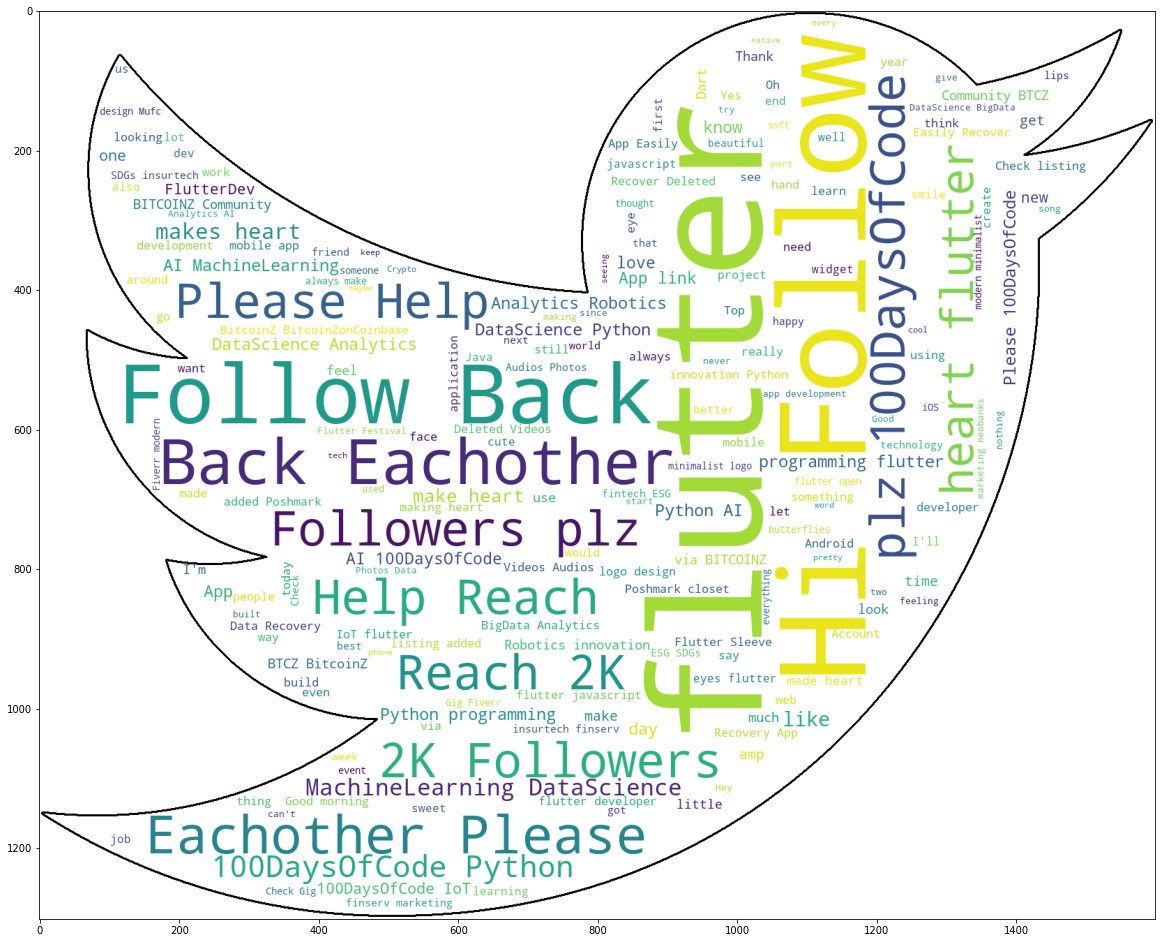

In [118]:
img = cv2.imread('wc.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(20,20))
plt.imshow(img)
plt.show()